# Fourier Transform

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import style
from IPython import display
from matplotlib import animation

style.use('ggplot')

# %matplotlib inline

## Sine wave


$A_{shift} + A \sin(2{\pi}{f}{t} + \phi )$

A = Amplitude\
$A_{shift}$ = Amplitude Shift\
f = frequency\
t = time\
$\phi$ = phase shift


In [2]:

def sine_wave_gen(n_cycles, sampling, freq , start = 0, end = 10, amplitude = 1, amp_shift = 0, phase_shift = 0):
    
    # freq = 1
    # n_cycles = 10
    # sampling = 30
    
    interval = 1 / (sampling * freq)
    
    time = np.arange(start, end, interval)
    
    wave = amp_shift + amplitude * np.sin( 2 * np.pi * freq * time + phase_shift)
    
    return wave, time

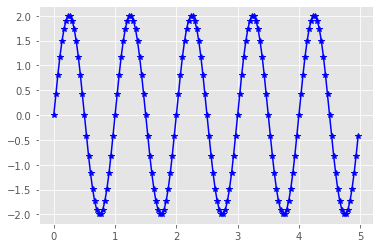

In [3]:
wave, time = sine_wave_gen(n_cycles = 30, sampling = 30 , freq = 1, start = 0, end = 5, amplitude = 2)
plt.plot(time,wave,'b-*')

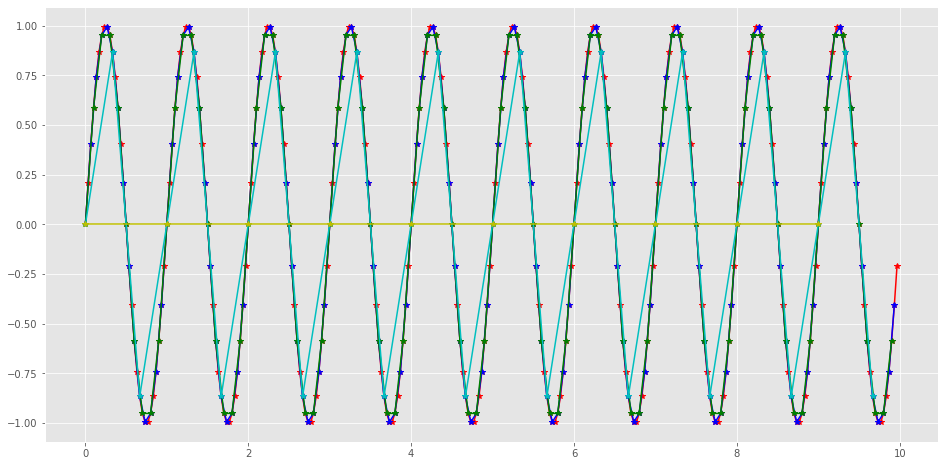

In [4]:

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)


wave, time = sine_wave_gen(n_cycles = 30, sampling = 30 , freq = 1)
ax.plot(time, wave, 'r-*')

wave, time = sine_wave_gen(n_cycles = 30, sampling = 15 , freq = 1)
ax.plot(time, wave, 'b-*')

wave, time = sine_wave_gen(n_cycles = 30, sampling = 10 , freq = 1)
ax.plot(time, wave, 'g-*')


wave, time = sine_wave_gen(n_cycles = 30, sampling = 3 , freq = 1)
ax.plot(time, wave, 'c-*')

wave, time = sine_wave_gen(n_cycles = 30, sampling = 1, freq = 1)
ax.plot(time, wave, 'y-*')

plt.show()

## Sine Wave Animation

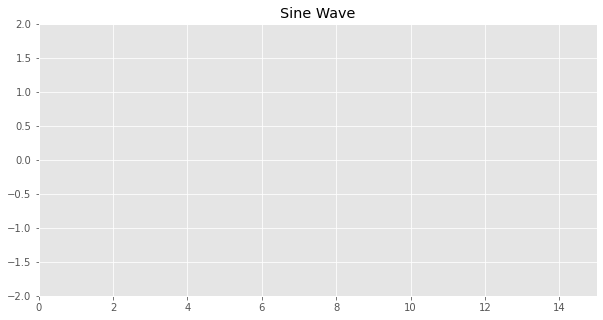

In [5]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,(1,2))

ax1.set_xlim(( 0, 15))            
ax1.set_ylim((-2, 2))

txt_title = ax1.set_title('Sine Wave')
plot1, = ax1.plot([], [], 'b.-', lw=2)

In [6]:
n_cycles = 20
freq = 1
sampling = 30

def draw_frame(n):
    
    wave, time = sine_wave_gen(n_cycles, sampling, freq, phase_shift=n)
    plot1.set_data(time,wave)
    return (plot1,)

anim = animation.FuncAnimation(fig, draw_frame, frames=100, interval=100, blit=True)

display.HTML(anim.to_html5_video())

## Frequency Fourier Transform

### Winding plane

$X_{k} = \sum_{n=0}^{N} x_n e^{-{i}{2}{\pi}{k}\frac{n}{N}} $

In [68]:
n_cycles = 10
freq = 1
samples_per_cycle = 50
sine_wave, time = sine_wave_gen(n_cycles, sampling, freq)

In [69]:
N = sine_wave.shape[0]

In [70]:
# k = 0
# X = (sine_wave * np.exp(-2 * np.pi * k * (np.arange(N)/N) * 1j)).sum()
# X

values = []
for k in range(N):
    X = (sine_wave * np.exp(-2 * np.pi * k * (np.arange(N)/N) * 1j)).sum()
    values.append(X)
    
values = np.array(values)

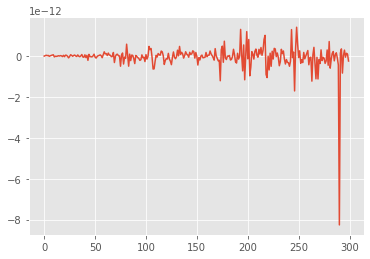

In [10]:
plt.plot(values.real)

In [11]:
N = 4

np.exp(-1j * 2 * np.pi * (1/N))

(6.123233995736766e-17-1j)

In [12]:
def freq_plane(x,k,N):
    return x * np.exp(-1j *2 * np.pi * k * (np.arange(N)/N))

def freq_transform(x):
    N = x.shape[0]
    values = []
    for k in range(N):
        X = (freq_plane(x,k,N)).sum()
        values.append(X)

    values = np.array(values)
    return values

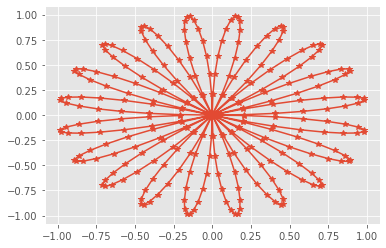

In [13]:
plane = freq_plane(sine_wave,1,sine_wave.shape[0])
plt.plot(plane.real,plane.imag,marker='*')
plt.show()

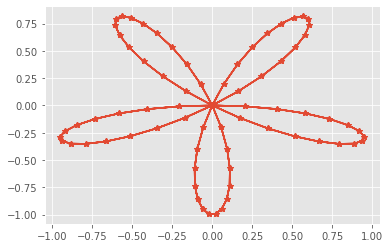

In [14]:
plane = freq_plane(sine_wave,2,sine_wave.shape[0])
plt.plot(plane.real,plane.imag,marker='*')
plt.show()

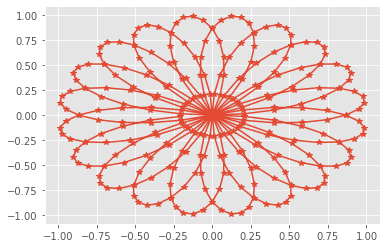

In [15]:
plane = freq_plane(sine_wave,3,sine_wave.shape[0])
plt.plot(plane.real,plane.imag,marker='*')
plt.show()

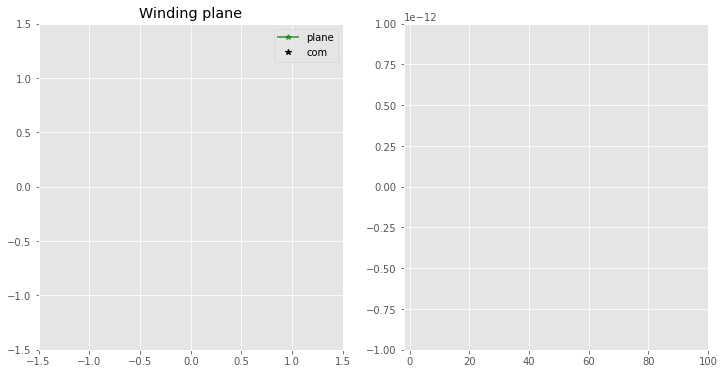

In [16]:
fig = plt.figure(figsize=(12,6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.set_xlim((-1.5, 1.5))            
ax1.set_ylim((-1.5, 1.5))

ax2.set_xlim((-2, 100))            
ax2.set_ylim((-1e-12, 1e-12))

txt_title = ax1.set_title('Winding plane')
plot1, = ax1.plot([], [], 'g*-', lw=2, alpha=0.6,label='plane')
plot2, = ax1.plot([], [], 'k*', label='com')

plot3, = ax2.plot([], [], 'k-')

ax1.legend()

In [17]:
n_cycles = 10
freq = 1
samples_per_cycle = 50

l_com = []
i_com = []

sine_wave, time = sine_wave_gen(n_cycles, sampling, freq)
N = sine_wave.shape[0]
def draw_frame(n):
    plane = freq_plane(sine_wave,n+1,N)
    plot1.set_data(plane.real,plane.imag)
    
    com = plane.sum()
    plot2.set_data(com.real,com.imag)
    
    l_com.append(com.real)
    i_com.append(n)
    
    plot3.set_data(i_com,l_com)
    txt_title.set_text(f"freq : {n+1}")
    return (plot1,plot2,plot3)

anim = animation.FuncAnimation(fig, draw_frame, frames=100, interval=1000, blit=True)

display.HTML(anim.to_html5_video())

## Inverse Frequency Fourier Transform

$x_{k} = \frac{1}{N}\sum_{n=0}^{N} X_n e^{{i}{2}{\pi}{k}\frac{n}{N}} $

In [28]:
def inv_freq_transform(x):
    N = x.shape[0]

    inv_values = []

    for k in range(N):
        X = (x * np.exp(2 * np.pi * k * (np.arange(N)/N) * 1j)).sum() / N
        inv_values.append(X)

    inv_values = np.array(inv_values)
    
    return inv_values.real

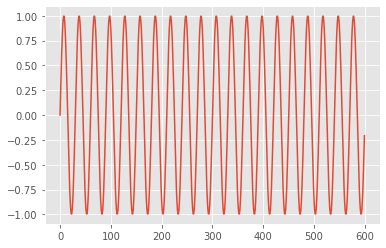

In [124]:
n_cycles = 15
freq = 2
samples_per_cycle = 100
sine_wave, time = sine_wave_gen(n_cycles, sampling, freq)

plt.plot(sine_wave)

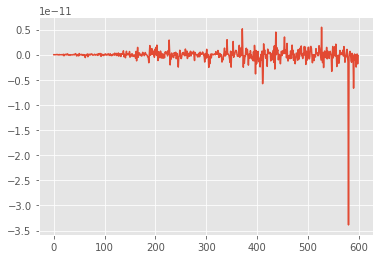

In [127]:
values = freq_transform(sine_wave)

plt.plot(values.real)

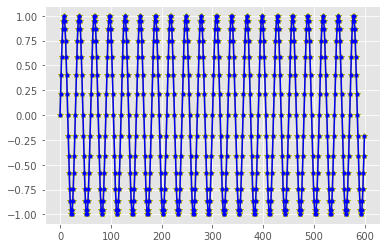

In [128]:
inv_values = inv_freq_transform(values)

plt.plot(inv_values,'y*-')
plt.plot(sine_wave,'b.-')